<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/a)_K_Means_algorithm_using_Python_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing k-Means Clustering from Scratch using the Iris Dataset
The k-Means clustering algorithm is a widely used unsupervised learning technique to group similar data points into clusters. In this notebook, we implement k-Means clustering from scratch using the Iris dataset.

Step 1: Import Necessary Libraries

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Step 2: Load and Explore the Iris Dataset

In [4]:

# Load the Iris dataset
iris = load_iris()
data = iris.data
features = iris.feature_names

# Convert to DataFrame for easy manipulation
df = pd.DataFrame(data, columns=features)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Step 3: Preprocess the Data

In [5]:

# Scale the data for better performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reduce dimensions for visualization (optional)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


Step 4: Implement k-Means Clustering from Scratch

In [6]:

def initialize_centroids(data, k):
    """
    Randomly initialize k centroids from the data.
    """
    np.random.seed(42)
    random_indices = np.random.permutation(data.shape[0])[:k]
    return data[random_indices]

def assign_clusters(data, centroids):
    """
    Assign each data point to the nearest centroid.
    """
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """
    Compute new centroids as the mean of all points assigned to each cluster.
    """
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means_clustering(data, k, max_iters=100, tolerance=1e-4):
    """
    Perform k-Means clustering.
    """
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)

        # Check for convergence
        if np.linalg.norm(centroids - old_centroids) < tolerance:
            break
    return centroids, labels

# Run k-Means clustering
k = 3
centroids, labels = k_means_clustering(data_scaled, k)


Step 5: Visualize the Clusters

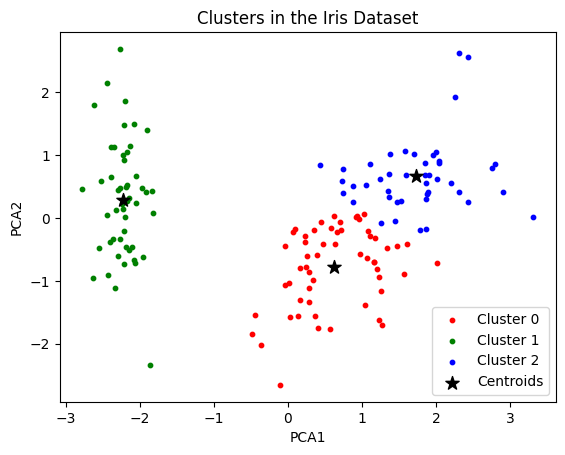

In [7]:

# Plot clusters
colors = ['red', 'green', 'blue']
labels = np.array(labels)  # Ensure labels is an array for indexing
for i in range(k):
    cluster_data = data_pca[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=10, color=colors[i], label=f'Cluster {i}')

# Plot centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', marker='*', label='Centroids')

plt.title("Clusters in the Iris Dataset")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


Step 6: Evaluate Using the Elbow Method

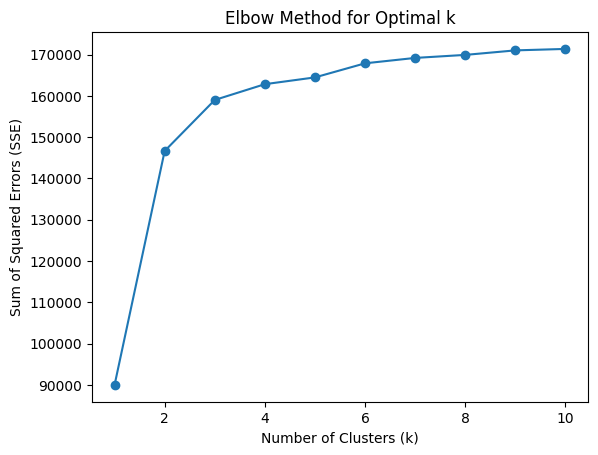

In [8]:

# Compute SSE for different values of k
sse = []
k_values = range(1, 11)
for k in k_values:
    centroids, labels = k_means_clustering(data_scaled, k)
    distances = np.linalg.norm(data_scaled[:, np.newaxis] - centroids[labels], axis=2)
    sse.append(np.sum(distances**2))

# Plot SSE
plt.plot(k_values, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.show()
